# Add imports

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
from keras.optimizers import Adam
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model



# Hyperparameters


In [4]:
num_classes = 9
batch_size = 32
img_rows, img_cols = 64, 64
input_shape = (img_rows, img_cols, 3)
epochs = 50

# Create a Sequential model

In [5]:
model = Sequential()

# Add layers to the model
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

#### Note that the last Dense layer has 'num_classes' units and a 'softmax' activation function, 
#### which is appropriate for multiclass classification.


In [6]:
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

# Data augmentation


### Augmentation for test data

In [7]:
import os

# function to print number of images per category
def print_images_per_category(directory):
    for category in sorted(os.listdir(directory)):
        category_dir = os.path.join(directory, category)
        num_images = len(os.listdir(category_dir))
        print(f"Category: {category}, Number of Images: {num_images}")


### Generator for test and train data

In [8]:

test_datagen = ImageDataGenerator(rescale=1./255)

# Directories
test_dir = 'dataset/test/'


test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode='categorical')

# Print number of images per category
print_images_per_category(test_dir)

# print class labels for both training and test set
print("Class labels for test set: ", test_set.class_indices)


Found 663 images belonging to 9 classes.


Category: black, Number of Images: 100
Category: blue, Number of Images: 100
Category: brown, Number of Images: 40
Category: green, Number of Images: 35
Category: pink, Number of Images: 100
Category: red, Number of Images: 100
Category: silver, Number of Images: 40
Category: white, Number of Images: 49
Category: yellow, Number of Images: 99
Class labels for test set:  {'black': 0, 'blue': 1, 'brown': 2, 'green': 3, 'pink': 4, 'red': 5, 'silver': 6, 'white': 7, 'yellow': 8}


In [9]:
# ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_dir = 'dataset/train'
# Creating generators
training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode='categorical')

print_images_per_category(train_dir)
print("Class labels for training set: ", training_set.class_indices)


Found 1472 images belonging to 9 classes.
Category: black, Number of Images: 179
Category: blue, Number of Images: 183
Category: brown, Number of Images: 130
Category: green, Number of Images: 129
Category: pink, Number of Images: 199
Category: red, Number of Images: 195
Category: silver, Number of Images: 135
Category: white, Number of Images: 133
Category: yellow, Number of Images: 195
Class labels for training set:  {'black': 0, 'blue': 1, 'brown': 2, 'green': 3, 'pink': 4, 'red': 5, 'silver': 6, 'white': 7, 'yellow': 8}


# TensorBoard


In [8]:
tensorboard = TensorBoard(log_dir='logs', histogram_freq=0, write_graph=True, write_images=False)

### Summary of the model

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

### Preview images from the train dataset


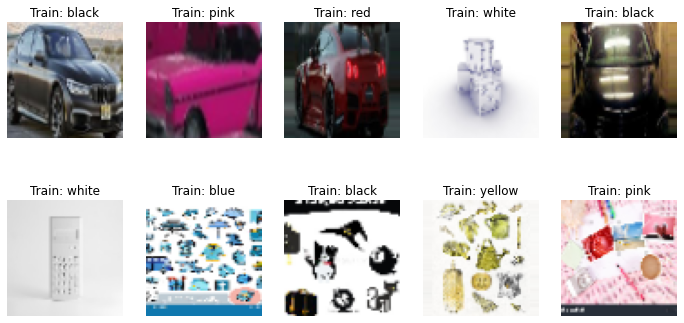

In [10]:
train_images, train_labels = next(training_set)
train_class_names = list(training_set.class_indices.keys())

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i])
    plt.title(f"Train: {train_class_names[np.argmax(train_labels[i])]}")
    plt.axis('off')
plt.show()


### Train Data

In [11]:
# Training
history = model.fit(
    training_set,
    steps_per_epoch=training_set.samples // batch_size,
    epochs=epochs,
    validation_data=test_set,
    validation_steps=test_set.samples // batch_size,
    callbacks=[tensorboard])

Epoch 1/50
 9/46 [====>.........................] - ETA: 16s - loss: 2.2651 - accuracy: 0.1319

c:\Users\muhri\anaconda3\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


46/46 [==============================] - 26s 540ms/step - loss: 1.9122 - accuracy: 0.2880 - val_loss: 1.2919 - val_accuracy: 0.5109
Epoch 2/50
46/46 [==============================] - 16s 334ms/step - loss: 1.4228 - accuracy: 0.4776 - val_loss: 0.9753 - val_accuracy: 0.6891
Epoch 3/50
46/46 [==============================] - 15s 324ms/step - loss: 1.2709 - accuracy: 0.5571 - val_loss: 0.8498 - val_accuracy: 0.7109
Epoch 4/50
46/46 [==============================] - 15s 317ms/step - loss: 1.0856 - accuracy: 0.6474 - val_loss: 0.7430 - val_accuracy: 0.7578
Epoch 5/50
46/46 [==============================] - 15s 321ms/step - loss: 1.0085 - accuracy: 0.6712 - val_loss: 0.6350 - val_accuracy: 0.7828
Epoch 6/50
46/46 [==============================] - 15s 318ms/step - loss: 0.9760 - accuracy: 0.6977 - val_loss: 0.6366 - val_accuracy: 0.8000
Epoch 7/50
46/46 [==============================] - 16s 342ms/step - loss: 0.8968 - accuracy: 0.7208 - val_loss: 0.6310 - val_accuracy: 0.7828
Epoch 8/50

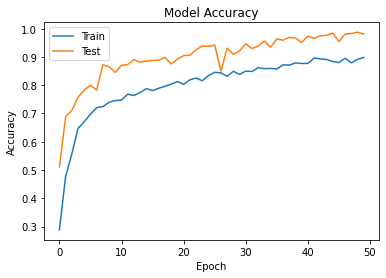

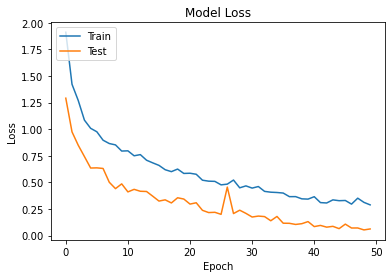

In [12]:

# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [18]:
%pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [16]:
%pip install pydotplus

     -------------------------------------- 278.7/278.7 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24578 sha256=08453d6777e0bdf83cfa350dec709a8f66ab4474d432add94613ffc29916c8aa
  Stored in directory: c:\users\muhri\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [17]:
%conda install graphviz

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\muhri\anaconda3

Note: you may need to restart the kernel to use updated packages.
  added / updated specs:
    - graphviz



The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |       he04af86_2         1.5 MB
    expat-2.4.9                |       h6c2663c_0         207 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
    getopt-win32-0.1           |       h2bbff1b_0          19 KB
    glib-2.69.1                |       h5dc1a3c_1         1.6 MB
    graphite2-1.3.14           |       hd77b12b_1          91 KB
    graphviz-2.50.0            |       hdb8b0d4_0         903 KB
    gts-0.7.6                  |       h63ab5a1_3         181 KB
    harfbuzz-4.3.0             |       hb646838_1         855 KB
    libgd-2.



==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0




    pixman-0.40.0              |       h2bbff1b_1         402 KB
    ------------------------------------------------------------
                                           Total:         6.7 MB

The following NEW packages will be INSTALLED:

  cairo              pkgs/main/win-64::cairo-1.16.0-he04af86_2 
  expat              pkgs/main/win-64::expat-2.4.9-h6c2663c_0 
  fribidi            pkgs/main/win-64::fribidi-1.0.10-h62dcd97_0 
  getopt-win32       pkgs/main/win-64::getopt-win32-0.1-h2bbff1b_0 
  glib               pkgs/main/win-64::glib-2.69.1-h5dc1a3c_1 
  graphite2          pkgs/main/win-64::graphite2-1.3.14-hd77b12b_1 
  graphviz           pkgs/main/win-64::graphviz-2.50.0-hdb8b0d4_0 
  gts                pkgs/main/win-64::gts-0.7.6-h63ab5a1_3 
  harfbuzz           pkgs/main/win-64::harfbuzz-4.3.0-hb646838_1 
  libffi             pkgs/main/win-64::libffi-3.4.4-hd77b12b_0 
  libgd              pkgs/main/win-64::libgd-2.3.3-ha43c60c_1 
  pango              pkgs/main/win-64::pango




graphite2-1.3.14     | 91 KB     | #7         |  18% 




glib-2.69.1          | 1.6 MB    | #6         |  17% 





harfbuzz-4.3.0       | 855 KB    | ######1    |  62% 
cairo-1.16.0         | 1.5 MB    | ###1       |  32% 

graphviz-2.50.0      | 903 KB    | ########3  |  83% 




glib-2.69.1          | 1.6 MB    | ##         |  21% 







graphite2-1.3.14     | 91 KB     | ########## | 100% 







graphite2-1.3.14     | 91 KB     | ########## | 100% 
cairo-1.16.0         | 1.5 MB    | ####       |  40% 





harfbuzz-4.3.0       | 855 KB    | #######1   |  71% 








getopt-win32-0.1     | 19 KB     | ########6  |  86% 

graphviz-2.50.0      | 903 KB    | #########2 |  92% 




glib-2.69.1          | 1.6 MB    | ##9        |  30% 





harfbuzz-4.3.0       | 855 KB    | ########2  |  82% 








getopt-win32-0.1     | 19 KB     | ########## | 100% 




glib-2.69.1          | 1.6 MB    | ###8       |  39% 
cairo-1.16.0         | 1.5 MB    | ####8      |  48% 





harfbuzz-4.

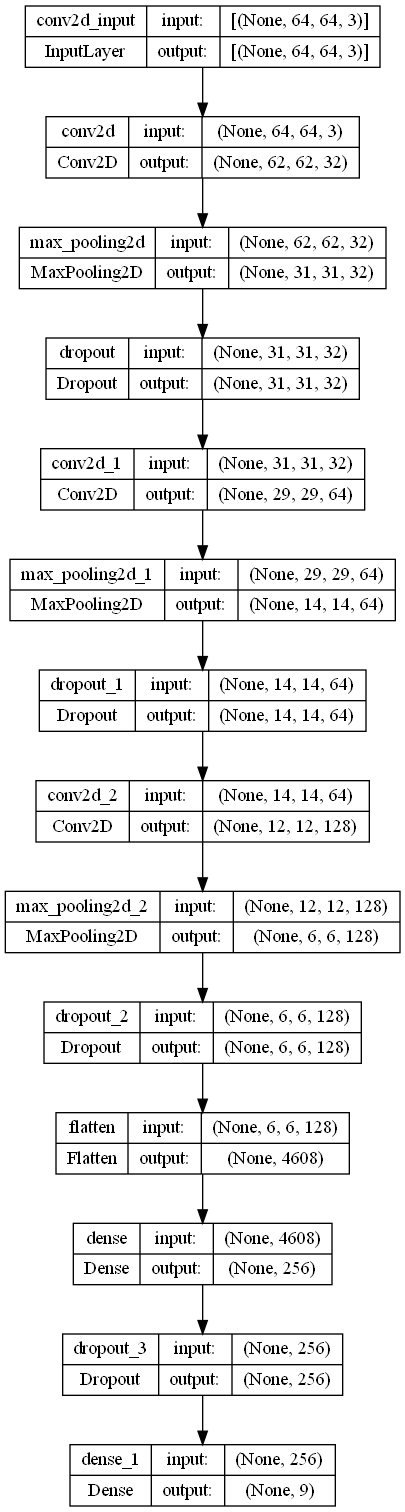

In [18]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


### Preview images after training

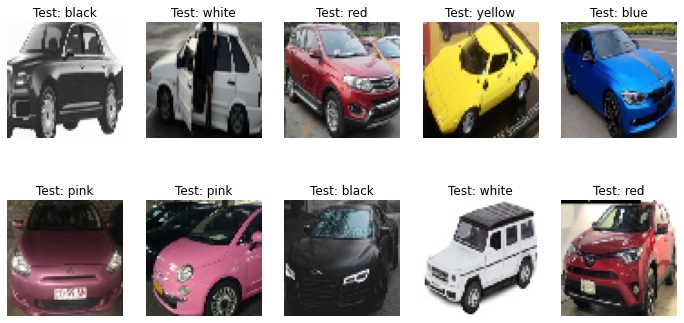

In [15]:
test_images, test_labels = next(test_set)
test_class_names = list(test_set.class_indices.keys())

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i])
    plt.title(f"Test: {test_class_names[np.argmax(test_labels[i])]}")
    plt.axis('off')
plt.show()


## Export model to H5

In [16]:
# Save the model
model.save('color_model.h5')


### Export to TF Lite

In [17]:

# Load the model
model = tf.keras.models.load_model('color_model.h5')

# Convert the model to tflite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the tflite model to a file
with open('color_model.tflite', 'wb') as f:
  f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\muhri\AppData\Local\Temp\tmpl03ou9sw\assets


INFO:tensorflow:Assets written to: C:\Users\muhri\AppData\Local\Temp\tmpl03ou9sw\assets
